# T09 Resampling
## Lanoratorio de Aprendizaje estadistico 
**Isabela Torres - Septien Uribe**
730667

## Conceptual


1. Using basic statistical properties of the variance, as well as single￾variable calculus, derive (5.6). In other words, prove that α given by
(5.6) does indeed minimize Var(αX + (1 − α)Y ).    
we will prove the next ecuation

$ \alpha = (\sigma^2_Y - \sigma_XY)/ 2(\sigma^2_X + \sigma^2_y - 2\sigma_XY) $  
donde 
$ \sigma^2_X = Var(X), \sigma^2_y = var(Y)$ y   
$\sigma_XY = Cov(X,Y) $  




Propiedade de varianza
Var(aX + bY) = $a^2\sigma^2_X + b^2\sigma^2_Y + 2ab\sigma_{XY}$

$(1-\alpha)^2 = 1-2\alpha + \alpha^2$

Convertimos a una funcion cuadratica  
Derviamos  
$V'(\alpha) = 2A\alpha + B$

Sustituimos
$\alpha = (\sigma^2_Y - \sigma_XY)/ (\sigma^2_X + \sigma^2_Y - 2\sigma_{XY})$

Utilizamos la segunda derivada 
$V' (\alpha) = 2A = 2(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY})$  
$= 2Var(X-Y) \geq 0$



2. We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer. The probability that it isn't the jth   
$ 1 \neq j = 1-\frac{1}{n} = \frac{n-1}{n}$



(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?    
$2 \neq j= (1-\frac{1}{n}) = \frac{n-1}{n}$

(c) Argue that the probability that the jth observation is not in the
bootstrap sample is (1 − 1/n)n.
the probability that the jth observation is not of the sample  
P(jth is not in the sample) 
$= (1-\frac{1}{n})^n$



(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?  
The probability of n = 5
$= 1- (1-\frac{1}{n})^5$


(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?  
$= 1- (1-\frac{1}{n})^100$


(f) When n = 10, 000, what is the probability that the jth observa￾tion is in the bootstrap sample?  
$= 1- (1-\frac{1}{n})^10000$




(g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.


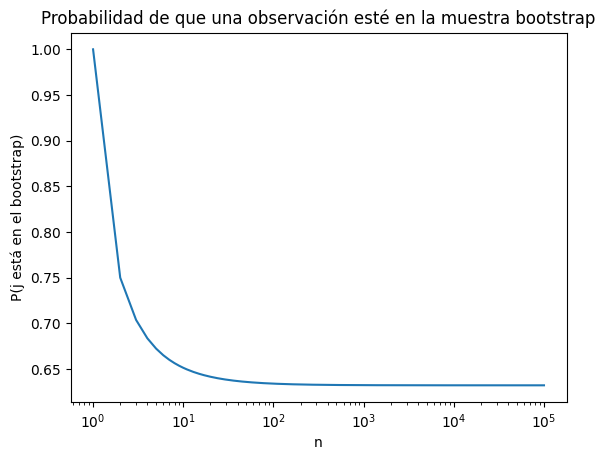

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n_vals = np.arange(1, 100001)
p_in = 1 - (1 - 1/n_vals)**n_vals

plt.plot(n_vals, p_in)
plt.xscale('log')   # opcional, para ver mejor el comportamiento
plt.xlabel('n')
plt.ylabel('P(j está en el bootstrap)')
plt.title('Probabilidad de que una observación esté en la muestra bootstrap')
plt.show()




(h) We will now investigate numerically the probability that a boot￾strap sample of size n = 100 contains the jth observation. Here
j = 4. We first create an array store with values that will subse￾quently be overwritten using the function np.empty(). We then np.empty()


In [10]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)


np.float64(0.0089)

Conclusión  
En este codigo se simula 10,000 el proceso de bootstrap además de que estimas la probabilidad de que aparezca n tamaño en este caso 4 en nuestra simulación


5.4 Exercises 225
repeatedly create bootstrap samples, and each time we record
whether or not the fifth observation is contained in the bootstrap
sample.
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
store[i] = np.sum(rng.choice(100, replace=True) == 4)
> 0
np.mean(store)
Comment on the results obtained.
3. We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.
(b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
i. The validation set approach?
ii. LOOCV?
4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.

In [11]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0

np.mean(store)


np.float64(0.0089)

El modelo genera 10 indices de remplazo en el cual, buscamos el indice cuatro por lo que encontramos el promedio de cuanto aparece el 4 en un bootstrap. Este tiene el mismo tamaño a la muestra por lo que 0.0089 es la probabilidadde que aparezca. 

a) K-folds se usa para entender que tan bien el modelo estadistico se entrena, En cada loop está haciendose este entrenamiento.  
b) Ventajas- Más estable, usa mejor la data porque se entrena el 90% de esta data cada vez, mucho más rapido, y no tiene una vaarianza grande
Desventajas- Es más carro que hacer un split.

## Applied

5. In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

- (a) Fit a logistic regression model that uses income and balance to
predict default.
- (b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:
    i. Split the sample set into a training set and a validation set.
    ii. Fit a multiple logistic regression model using only the train￾ing observations.
    iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
    iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
- (c) Repeat the process in 
- (b) three times, using three different splits of the observations into a training set and a validation set. Com￾ment on the results obtained. 226 5. Resampling Methods
- (d) Now consider a logistic regression model that predicts the prob￾ability of default using income, balance, and a dummy variable for student. Estimate the test error for his model using the val￾idation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.



In [24]:
import pandas as pd
from ISLP import load_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
Default = load_data('Default')
Default


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [36]:
print(Default.columns.tolist())


['default', 'student', 'balance', 'income']


In [37]:
Default = pd.get_dummies(Default, columns=['default', 'student'], drop_first=True)
Default


,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False
...,...,...,...,...
9995,711.555020,52992.378914,False,False
9996,757.962918,19660.721768,False,False
9997,845.411989,58636.156984,False,False
9998,1569.009053,36669.112365,False,False


In [41]:


X = Default[['balance', 'income']]
y = Default['default_Yes']

model = LogisticRegression()
model.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
np.random.seed(1)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=1
)
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_val)[:, 1]
y_pred = (probs >= 0.5).astype(int)

val_error = np.mean(y_pred != y_val)
print(f"Validation Error Rate: {val_error:.4f}")

Validation Error Rate: 0.0250


In [43]:
errors = []

for seed in [1, 2, 3]:
    np.random.seed(seed)
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.5, random_state=seed
    )
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    probs = model.predict_proba(X_val)[:, 1]
    pred_class = (probs > 0.5).astype(int)
    
    errors.append(np.mean(pred_class != y_val))

errors


[np.float64(0.025), np.float64(0.0248), np.float64(0.0248)]

In [ ]:

X2 = Default[["income", "balance", "student_Yes"]]
y = Default["default_Yes"]


np.random.seed(1)
X_train, X_val, y_train, y_val = train_test_split(
    X2, y, test_size=0.5, random_state=1
)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

probs2 = model2.predict_proba(X_val)[:, 1]
pred2 = (probs2 > 0.5).astype(int)

val_error2 = np.mean(pred2 != y_val)
val_error2
#validation error rate: 0.0268 this means 


np.float64(0.0262)

Resultado  
Nuestro validation error rate es 2.62% lo que quiere decir que en nuestra regressión este porcentaje, es la cantidad de errores que va a tener la regresión. 



6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coeffi￾cients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.
- (a) Using the summarize() and sm.GLM() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.
- (b) Write a function, boot_fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.
- (c) Following the bootstrap example in the lab, use your boot_fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.
(d) Comment on the estimated standard errors obtained using the
sm.GLM() function and using the bootstrap.

In [47]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:              vie., 28 nov. 2025   Deviance:                       1579.0
Time:                        17:13:52   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

In [55]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

B0_bootstrap_m1 = []
B1_bootstrap_m1 = []   

for i in range(1000):
    X_resampled, y_resampled = resample(X, y)

    lr_bootstrap = LogisticRegression(solver="liblinear")
    lr_bootstrap.fit(X_resampled, y_resampled)

    B0_bootstrap_m1.append(lr_bootstrap.intercept_[0])
    B1_bootstrap_m1.append(lr_bootstrap.coef_[0])   


In [56]:
#c)
se_income_boot = np.std([coef[0] for coef in B1_bootstrap_m1])
se_balance_boot = np.std([coef[1] for coef in B1_bootstrap_m1])

se_income_boot, se_balance_boot

(np.float64(0.09833737073888042), np.float64(0.0001068726489157149))

Resultados 
Los valores me muestran el error estandás de bootstrap por lo que, nos dice cual es la incertidumbre alrededor del estimados y que tan preciso es nuestra estimación. 


7. In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function
can be used in order to compute the LOOCV test error estimate.
Alternatively, one could compute those quantities using just sm.GLM()
and the predict() method of the fitted model within a for loop. You
will now take this approach in order to compute the LOOCV error
for a simple logistic regression model on the Weekly data set. Recall
that in the context of classification problems, the LOOCV error is
given in (5.4).
(a) Fit a logistic regression model that predicts Direction using Lag1
and Lag2.
(b) Fit a logistic regression model that predicts Direction using Lag1
and Lag2 using all but the first observation.
(c) Use the model from (b) to predict the direction of the first obser￾vation. You can do this by predicting that the first observation
will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this
observation correctly classified?
(d) Write a for loop from i = 1 to i = n, where n is the number of
observations in the data set, that performs each of the following
steps:



In [57]:
df = load_data("Weekly")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
df["Direction_num"] = (df["Direction"] == "Up").astype(int)

X = df[["Lag1", "Lag2"]]
y = df["Direction_num"]

X = sm.add_constant(X)

model3 = sm.GLM(y, X)
result3 = model3.fit()
print(result3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Direction_num   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:              vie., 28 nov. 2025   Deviance:                       1488.2
Time:                        17:35:54   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.0

In [64]:
#b) 
X_train = X.iloc[1:]
y_train = y.iloc[1:]

model4 = sm.GLM(y_train, X_train)
result4 = model4.fit()
print(result4.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          Direction_num   No. Observations:                 1088
Model:                            GLM   Df Residuals:                     1085
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                         0.24572
Method:                          IRLS   Log-Likelihood:                -778.76
Date:              vie., 28 nov. 2025   Deviance:                       266.61
Time:                        17:39:15   Pearson chi2:                     267.
No. Iterations:                     3   Pseudo R-squ. (CS):           0.007362
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5553      0.015     36.788      0.0

In [ ]:

#c)
prob1 = result4.predict(X.iloc[0:1])[0]
pred1 = 1 if prob1 > 0.5 else 0
actual1 = y.iloc[0]

print("Predicted:", pred1)
print("Actual:", actual1)
print("Correct?" , pred1 == actual1)

Predicted: 1
Actual: 0
Correct? False


Esto nos va a mostrar cuantos modelos son predecidos y si está bien o no

In [69]:
n = len(df)
errors = np.zeros(n)    

for i in range(n):

    X_train = X.drop(index=i)
    y_train = y.drop(index=i)
    
    model_i = sm.GLM(y_train, X_train).fit()
    
    prob_i = model_i.predict(X.iloc[i:i+1]).values[0]

    pred_i = 1 if prob_i > 0.5 else 0

    errors[i] = 1 if pred_i != y.iloc[i] else 0


5.4 Exercises 227
i. Fit a logistic regression model using all but the ith obser￾vation to predict Direction using Lag1 and Lag2.
ii. Compute the posterior probability of the market moving up
for the ith observation.
iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.
iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.
(e) Take the average of the n numbers obtained in (d)iv in order to
obtain the LOOCV estimate for the test error. Comment on the
results.



In [71]:
for i in range(n):

    # i modelo
    X_train = X.drop(index=i)
    y_train = y.drop(index=i)

    model_i = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

    # ii probabilidad posterior para la observación i
    prob_i = model_i.predict(X.iloc[i:i+1]).values[0]

    # iii Convertir a predicción de clase (Up = 1 si > 0.5)
    pred_i = 1 if prob_i > 0.5 else 0

    # iv 1 = No, 0 = Si
    errors[i] = 1 if pred_i != y.iloc[i] else 0


In [ ]:
LOOCV_error = errors.mean()
LOOCV_error

np.float64(0.44995408631772266)

El loocv error es un modelo que representa las observaciónes en el modelo que se predicieron, entonces se aplica como LeaveOneOutCross- Validation que basicamente es un modelo para entrenar el desempeño, en este caso el desempeño es muy bajo 44%, por lo que mi modelo no está generalizando tan bien


8. We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.
(b) Create a scatterplot of X against Y . Comment on what you find.
(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
i. Y = β0 + β1X + "
ii. Y = β0 + β1X + β2X2 + "
iii. Y = β0 + β1X + β2X2 + β3X3 + "
iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + " .
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .
(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?
(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.
(f) Comment on the statistical significance of the coefficient esti￾mates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?



In [73]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2*x**2 + rng.normal(size=100)

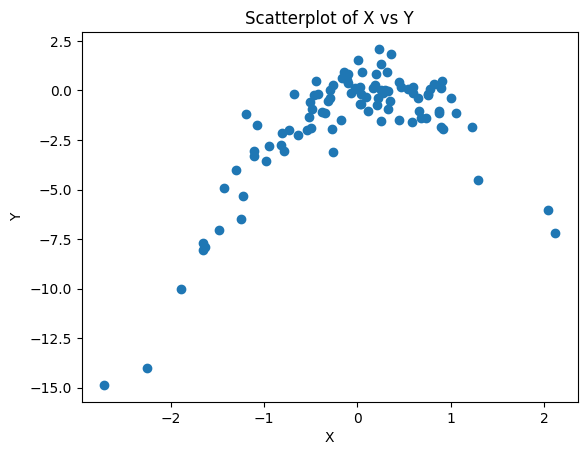

In [74]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.show()

Para empezar esta gráfica nos indica que no es lineal y tenemos que hacer otro modelo

In [ ]:
data = pd.DataFrame({"x": x, "y": y})
n = len(data)


def loocv_error(p):
    errors = np.zeros(n)
    for i in range(n):
        # entrenamiento
        train = data.drop(index=i)
        X_train = np.column_stack([train["x"]**k for k in range(0, p+1)])
        y_train = train["y"]

        model = sm.OLS(y_train, X_train).fit()

        # punto de validación
        X_val = np.array([data["x"].iloc[i]**k for k in range(0, p+1)])
        y_val = data["y"].iloc[i]

        pred = model.predict(X_val.reshape(1, -1))[0]

        errors[i] = (y_val - pred)**2

    return errors.mean()


In [78]:
np.random.seed(123)

loocv_1 = loocv_error(1)
loocv_2 = loocv_error(2)
loocv_3 = loocv_error(3)
loocv_4 = loocv_error(4)

loocv_1, loocv_2, loocv_3, loocv_4


(np.float64(6.633029839181983),
 np.float64(1.1229368563419688),
 np.float64(1.3017965489358907),
 np.float64(1.3323942694179332))

Aqui podemos definir que son los errores del modelo LOOCV que son 4 modelos, lineal, cuadratico, cúbico, y de grado 4. Nos dice que el mejor modelo es el de polinomio 2 que tiene el valor más bajo.

In [79]:
def fit_model(p):
    X_fit = np.column_stack([data["x"]**k for k in range(0, p+1)])
    model = sm.OLS(y, X_fit).fit()
    return model

model1 = fit_model(1)
model2 = fit_model(2)
model3 = fit_model(3)
model4 = fit_model(4)

print(model1.summary())
print(model2.summary())
print(model3.summary())
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:              vie., 28 nov. 2025   Prob (F-statistic):           1.04e-09
Time:                        17:59:35   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247     -5.937      0.0


9. We will now consider the Boston housing data set, from the ISLP
library.
(a) Based on this data set, provide an estimate for the population
mean of medv. Call this estimate µˆ.
228 5. Resampling Methods
(b) Provide an estimate of the standard error of µˆ. Interpret this
result.
Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the
number of observations.
(c) Now estimate the standard error of µˆ using the bootstrap. How
does this compare to your answer from (b)?
(d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results
obtained by using Boston['medv'].std() and the two standard
error rule (3.9).
Hint: You can approximate a 95 % confidence interval using the
formula [ˆµ − 2SE(ˆµ), µˆ + 2SE(ˆµ)].
(e) Based on this data set, provide an estimate, µˆmed, for the median
value of medv in the population.
(f) We now would like to estimate the standard error of µˆmed. Unfortunately, there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your findings.
(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity µˆ0.1.
(You can use the np.percentile() function.) np.
(h) Use the bootstrap to estimate the standard error of µˆ0.1. Com- percentile()
ment on your findings.

In [81]:
df2 = load_data("Boston")
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [87]:
medv = df2["medv"]
n = len(medv)

#media 
medv_mean = np.mean(medv)
medv_mean


np.float64(22.532806324110677)

In [88]:

#Error estandar
se_medv = np.std(medv, ddof=1) / np.sqrt(n)
se_medv



np.float64(0.40886114749753505)

In [89]:
np.random.seed(1)
B = 10000
boot_means = np.zeros(B)

for b in range(B):
    sample = medv.sample(n, replace=True)
    boot_means[b] = sample.mean()

se_boot = boot_means.std()
se_boot


np.float64(0.4119416621166591)

In [91]:
ci_lower_boot = medv_mean - 2 * se_boot
ci_upper_boot = medv_mean + 2 * se_boot
ci_lower_boot, ci_upper_boot

(np.float64(21.70892299987736), np.float64(23.356689648343995))

In [92]:
ci_lower_classic = medv_mean - 2 * se_medv
ci_upper_classic = medv_mean + 2 * se_medv
ci_lower_classic, ci_upper_classic

(np.float64(21.715084029115605), np.float64(23.35052861910575))

El metodo bootstrap CI es un modelo que muestra la distribución que tiene un aproximado normal, como era de esperase

In [93]:
#e) populacion media
me_med = medv.median()
me_med

np.float64(21.2)

In [ ]:
#f)
boot_medians = np.zeros(B)

for b in range(B):
    sample = medv.sample(n, replace=True)
    boot_medians[b] = sample.median()

se_med_boot = boot_medians.std()
se_med_boot


np.float64(0.37876533843529)

La mediana está más grande que la desviación estandar algo a considerar sin embargo, como estas no son efficientes estimadores se entiende.

In [95]:
#g)
mu_90 = np.percentile(boot_means, 90)
mu_90

np.float64(23.065632411067195)

In [96]:
#h)
boot_p10 = np.zeros(B)

for b in range(B):
    sample = medv.sample(n, replace=True)
    boot_p10[b] = np.percentile(sample, 10)

se_p10_boot = boot_p10.std()
se_p10_boot

np.float64(0.49574477617015794)

Conclusiones
Este porcentaje nos indica un valor mucho mayor, a los quantiles esperados por lo que, es mas variable que los datos se influencien